In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [0]:
import tensorflow as tf

# Loading Data

In [0]:
from tensorflow.keras.datasets import mnist

In [0]:
#path=os.getcwd()+'/mnist.npz'
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# PreProcessing

In [0]:
X_train = X_train / 255
X_test = X_test / 255

In [0]:
X_train = (X_train.reshape((-1,28,28,1)) * 2) - 1 
X_test = (X_test.reshape((-1,28,28,1)) * 2) - 1 

In [16]:
X_train.shape

(60000, 28, 28, 1)

In [0]:
only_zeros = X_train[y_train==0]

In [18]:
only_zeros.shape

(5923, 28, 28, 1)

In [19]:
only_zeros[0].max()

1.0

In [20]:
only_zeros.min()

-1.0

In [0]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Reshape,Conv2DTranspose,BatchNormalization,LeakyReLU,Flatten,Conv2D,Dropout

# Generator Model

In [0]:
with tf.device('/gpu:0'):
    coding_size = 100
    generator = Sequential()
    generator.add(Dense(7 * 7 * 128,input_shape=[coding_size]))
    generator.add(Reshape([7,7,128]))
    generator.add(BatchNormalization())
    generator.add(Conv2DTranspose(64,kernel_size=5,strides=2,padding='same',activation='relu'))
    generator.add(BatchNormalization())
    generator.add(Conv2DTranspose(1,kernel_size=5,strides=2,padding='same',activation='tanh'))

# Discriminator Model

In [0]:
#discriminator Model
with tf.device('/gpu:0'):
    discriminator = Sequential()
    discriminator.add(Conv2D(64,kernel_size=5,strides=2,padding='same',activation=LeakyReLU(0.3),input_shape=[28,28,1]))
    discriminator.add(Dropout(0.5))
    discriminator.add(Conv2D(128,kernel_size=5,strides=2,padding='same',activation=LeakyReLU(0.3),input_shape=[28,28,1]))
    discriminator.add(Dropout(0.5))
    discriminator.add(Flatten())
    discriminator.add(Dense(1,activation='sigmoid'))

# GAN

In [0]:
with tf.device('/gpu:0'):
    GAN = Sequential([generator,discriminator])

In [0]:
with tf.device('/gpu:0'):
    discriminator.compile(loss='binary_crossentropy',optimizer='adam')
    discriminator.trainable = False

In [0]:
with tf.device('/gpu:0'):
    GAN.compile(loss='binary_crossentropy',optimizer='adam')

In [0]:
batch_size = 32

In [0]:
my_data = only_zeros
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

In [0]:
dataset = dataset.batch(batch_size=batch_size,drop_remainder=True).prefetch(1)

# Training

In [0]:
epochs = 20

In [33]:
generator , discriminator = GAN.layers
with tf.device('/gpu:0'):
    for epoch in range(epochs):
        print(f'Currently on Epoch {epoch+1}')
        i =  0
      
        for X_batch in dataset:
            i = i + 1

            if i%100 == 0:
                print(f'\t Currently in batch number {i} of {len(my_data)//batch_size}')
          
          
            ##############################
            # DISCRIMINATOR TRINING PHASE#
            ##############################
          
            noise = tf.random.normal(shape=[batch_size,coding_size])
            gen_images = generator(noise)
            X_fake_vs_real = tf.concat([gen_images,tf.dtypes.cast(X_batch,tf.float32)],axis=0)
            y1 = tf.constant([[0.0]]*batch_size  + [[1.0]]*batch_size)
            discriminator.trainable = True
            discriminator.train_on_batch(X_fake_vs_real,y1)
          
            ##############################
            ##  GENERATOR TRINING PHASE ## 
            ##############################
          
            noise = tf.random.normal(shape=[batch_size,coding_size])
            y2  = tf.constant([[1.0]]*batch_size)
            discriminator.trainable = False
            GAN.train_on_batch(noise,y2)

Currently on Epoch 1
	 Currently in batch number 100 of 185
Currently on Epoch 2
	 Currently in batch number 100 of 185
Currently on Epoch 3
	 Currently in batch number 100 of 185
Currently on Epoch 4
	 Currently in batch number 100 of 185
Currently on Epoch 5
	 Currently in batch number 100 of 185
Currently on Epoch 6
	 Currently in batch number 100 of 185
Currently on Epoch 7
	 Currently in batch number 100 of 185
Currently on Epoch 8
	 Currently in batch number 100 of 185
Currently on Epoch 9
	 Currently in batch number 100 of 185
Currently on Epoch 10
	 Currently in batch number 100 of 185
Currently on Epoch 11
	 Currently in batch number 100 of 185
Currently on Epoch 12
	 Currently in batch number 100 of 185
Currently on Epoch 13
	 Currently in batch number 100 of 185
Currently on Epoch 14
	 Currently in batch number 100 of 185
Currently on Epoch 15
	 Currently in batch number 100 of 185
Currently on Epoch 16
	 Currently in batch number 100 of 185
Currently on Epoch 17
	 Currently

In [34]:
noise = tf.random.normal(shape=[10,coding_size])
noise.shape

TensorShape([10, 100])

In [0]:
images = generator(noise)

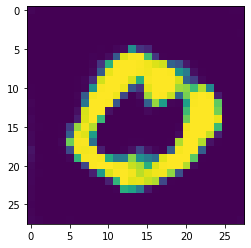

In [36]:
plt.imshow(images[3].numpy().reshape(28,28))

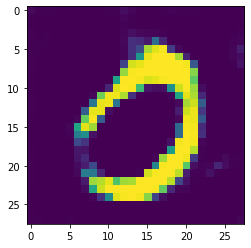

In [38]:
plt.imshow(images[0].numpy().reshape(28,28))

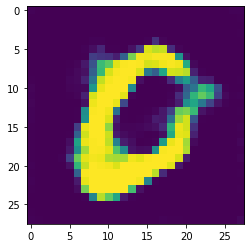

In [39]:
plt.imshow(images[9].numpy().reshape(28,28))

In [40]:
images[3].numpy().shape

(28, 28, 1)